In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Nov  1 07:36:29 2020

@author: moritzgerster
"""
import os
import mne
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.use('TkAgg')
%matplotlib qt
#%matplotlib tk

# %%
# =============================================================================
# Create MNE Info
# =============================================================================
ch_names = ['SMA', 'leftM1', 'rightM1',
            'STN_R01', 'STN_R12', 'STN_R23',
            'STN_L01', 'STN_L12', 'STN_L23',
            'EMG_R', 'EMG_L',
            'HEOG', 'VEOG',
            'event']
sfreq = 2400
ch_types = ["mag", "mag", "mag",
            "seeg", "seeg", "seeg", "seeg", "seeg", "seeg",
            "emg", "emg",
            "eog", "eog",
            "misc"]

info = mne.create_info(ch_names, sfreq, ch_types, verbose=True)


# %%
# =============================================================================
# LOAD SUBJECTS
# =============================================================================
n_sub = 14
path = '../../data/raw/rest/subj'

cond = "on"
raw_on = []

for subj in range(n_sub):
    path_subj = path + f'{subj+1}/{cond}/'  # subjects start at 1
    fname = os.listdir(path_subj)[0]  # load first file only
    data_subj = mne.io.read_raw_fieldtrip(path_subj + fname,
                                          info, data_name='data')
    raw_on.append(data_subj)

cond = "off"
raw_off = []

for subj in range(n_sub):
    path_subj = path + f'{subj+1}/{cond}/'  # subjects start at 1
    fname = os.listdir(path_subj)[0]  # load first file only
    data_subj = mne.io.read_raw_fieldtrip(path_subj + fname,
                                          info, data_name='data')
    raw_off.append(data_subj)

# %%
# =============================================================================
# PLOT RAW
# =============================================================================

fig = raw_on[0].plot()


Creating RawArray with float64 data, n_channels=14, n_times=456000
    Range : 0 ... 455999 =      0.000 ...   190.000 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=456000
    Range : 0 ... 455999 =      0.000 ...   190.000 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=460800
    Range : 0 ... 460799 =      0.000 ...   192.000 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=458400
    Range : 0 ... 458399 =      0.000 ...   191.000 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=463200
    Range : 0 ... 463199 =      0.000 ...   193.000 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=458400
    Range : 0 ... 458399 =      0.000 ...   191.000 secs
Ready.
Creating RawArray with float64 data, n_channels=12, n_times=456000
    Range : 0 ... 455999 =      0.000 ...   190.000 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=458400
    Range : 0 ..

In [5]:
import os
import mne

sample_data_folder = mne.datasets.sample.data_path()


Verifying hash 12b75d1cb7df9dfb4ad73ed82f61094f.
Decompressing the archive: /Users/moritzgerster/mne_data/MNE-sample-data-processed.tar.gz
(please be patient, this can take some time)
Successfully extracted to: ['/Users/moritzgerster/mne_data/MNE-sample-data']


In [6]:
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_raw.fif')

Opening raw data file /Users/moritzgerster/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 36037  =      0.000 ...    60.000 secs...



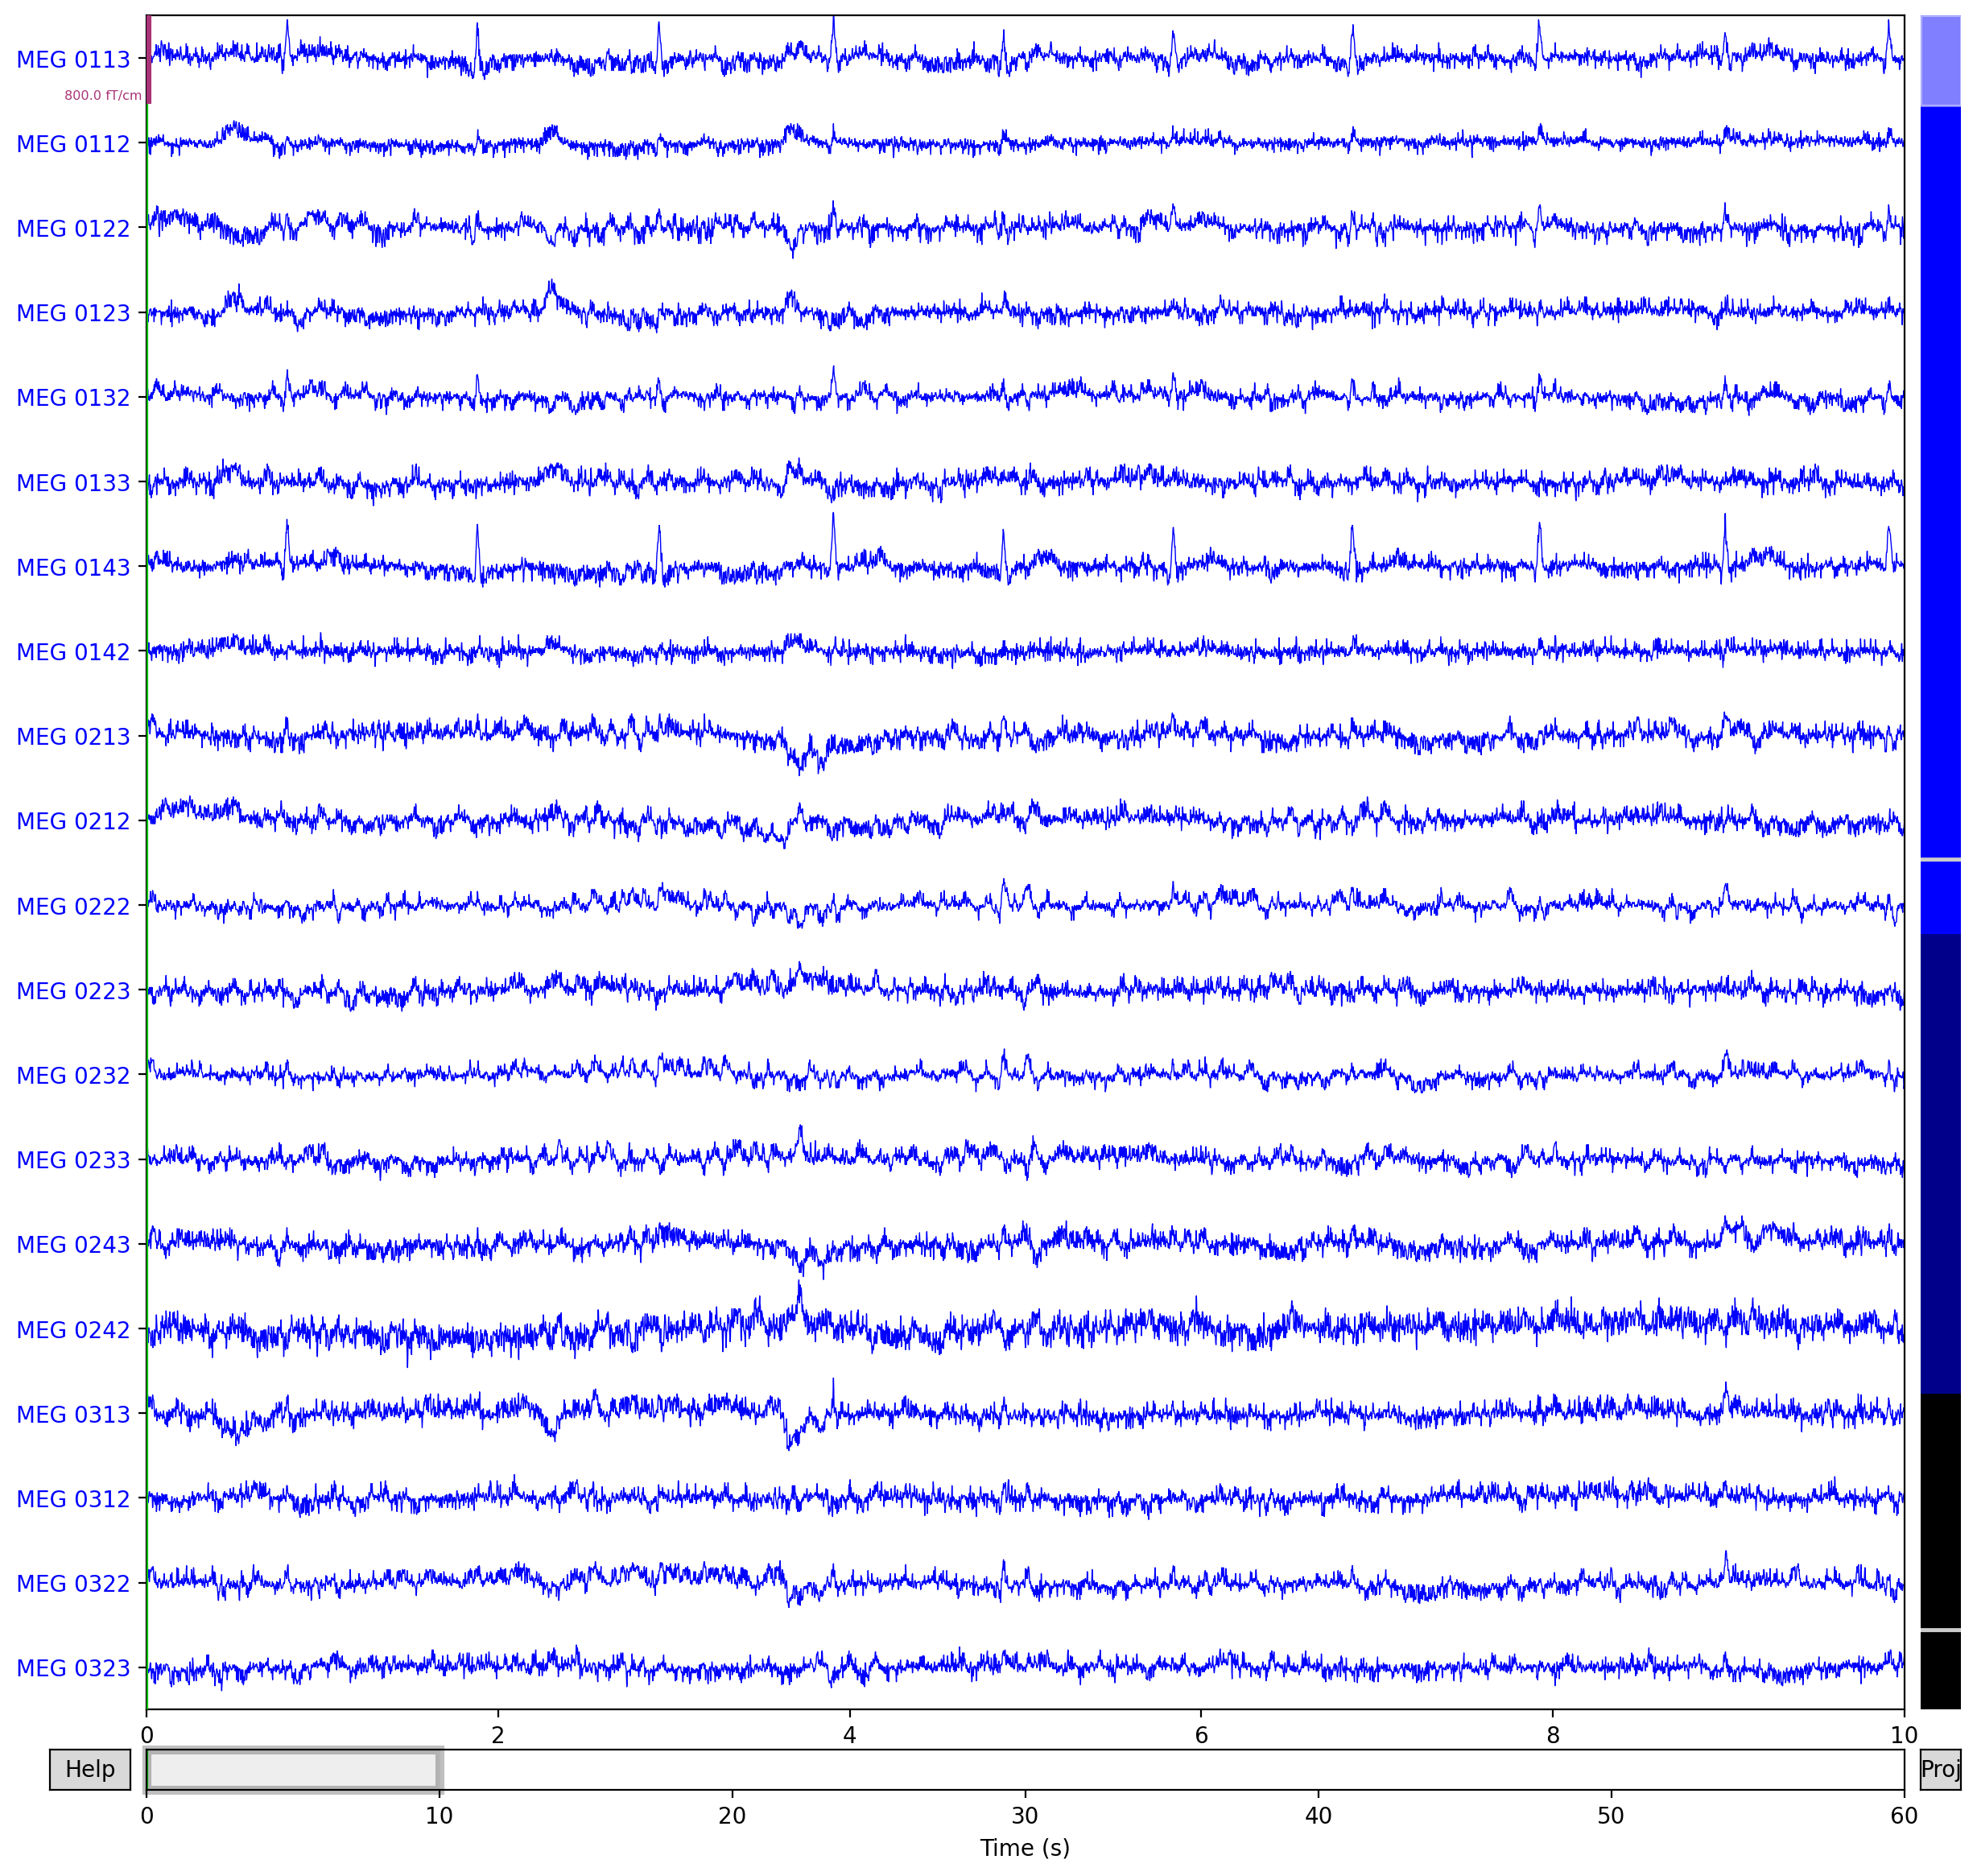

In [7]:
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw.crop(tmax=60).load_data()

raw.plot()